<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
dataset = pd.read_excel('/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/SVM/5.2 rf SVR/SVR/Data/Vuelos.xlsx')
dataset.head()

,activo_cod,ciclos,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [32]:
max = dataset.groupby('activo_cod').agg({'ciclos':'max'}).reset_index()
max.head() 

,activo_cod,ciclos
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


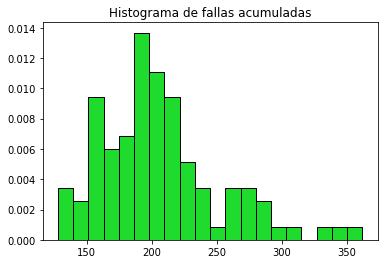

In [33]:
# histograma de probabilidad 

x = max.ciclos.values
intervalos = 20
cum = 0

a = plt.hist(x,density=1, cumulative = cum,bins = intervalos,color = '#1FDB2D', edgecolor = 'black')
plt.title('Histograma de fallas acumuladas')
plt.show()

In [44]:
# valores del histograma

eje_x = np.linspace(x.min(),x.max(),intervalos)

In [45]:
eje_y = a[0].reshape(intervalos,1) # reshape para redimensionar la lista
eje_y

array([[0.0034188 ],
       [0.0025641 ],
       [0.00940171],
       [0.00598291],
       [0.00683761],
       [0.01367521],
       [0.01111111],
       [0.00940171],
       [0.00512821],
       [0.0034188 ],
       [0.0008547 ],
       [0.0034188 ],
       [0.0034188 ],
       [0.0025641 ],
       [0.0008547 ],
       [0.0008547 ],
       [0.        ],
       [0.0008547 ],
       [0.0008547 ],
       [0.0008547 ]])

In [46]:
X = eje_x.reshape(-1,1)
Y = eje_y

ES NECESARIO ESCALAR LOS VALORES DEBIDO A LA GRAN DIFERENCIA ENTRE JE X Y EJE Y

In [47]:
# Requisito para un mejor SVR escalar variables, balanceo de datos
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

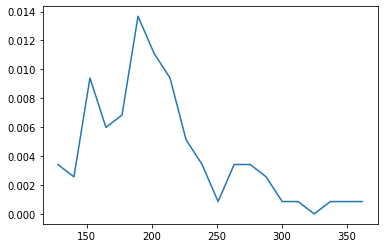

In [48]:
plt.plot(eje_x,eje_y)
plt.show()

Training the SVR model on the whole dataset

In [49]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #radio base function: no lineales
regressor.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
# Realizar predicciones
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform([[200]])))
#inverse_transform para que regrese a sus vlores originales ppero escalando

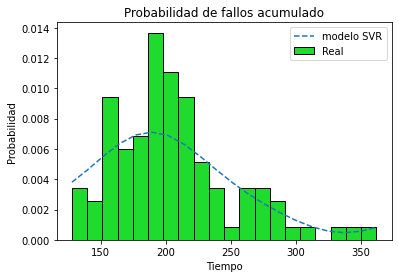

In [56]:
# Visualizando los resultados
plt.hist(x, density=1, cumulative = cum,bins = intervalos, color = '#1FDB2D', label = 'Real', edgecolor = 'black')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), ls = '--', label = 'modelo SVR')
plt.title('Probabilidad de fallos acumulado')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad')
plt.legend(loc = 'best')
plt.show()

BONDAD DE AJUSTE

In [63]:
# Definición del modelo
y_model =  sc_Y.inverse_transform(regressor.predict(X))
y_model = y_model.reshape(-1,1)

In [66]:
c = np.concatenate([sc_Y.inverse_transform(Y),y_model], axis = 1)
c[:5]

array([[0.0034188 , 0.00380262],
       [0.0025641 , 0.00464292],
       [0.00940171, 0.00555107],
       [0.00598291, 0.00636681],
       [0.00683761, 0.00692605]])

In [68]:
c = pd.DataFrame(c, columns = ['y_real','y_modelo'])
c.head()

,y_real,y_modelo
0,0.003419,0.003803
1,0.002564,0.004643
2,0.009402,0.005551
3,0.005983,0.006367
4,0.006838,0.006926


In [69]:
c.corr()

,y_real,y_modelo
y_real,1.000000,0.856597
y_modelo,0.856597,1.000000


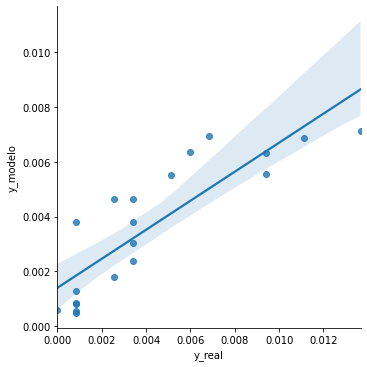

In [72]:
sns.lmplot(data = c, x = 'y_real', y = 'y_modelo')
plt.show()

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_model, sc_Y.inverse_transform(Y)))
print(mean_absolute_error(y_model, sc_Y.inverse_transform(Y)))
MAE = mean_absolute_error(y_model, sc_Y.inverse_transform(Y))
Acu_score = 1 - MAE
print(Acu_score)

5.138641042512935e-06
0.0014555685998792849
0.9985444314001207


In [81]:
# Personalización de métricas
c['Error'] = np.abs(c['y_real'] - c['y_modelo']) # diferencia de valores absolutos
c.head()

,y_real,y_modelo,Error
0,0.003419,0.003803,0.000384
1,0.002564,0.004643,0.002079
2,0.009402,0.005551,0.003851
3,0.005983,0.006367,0.000384
4,0.006838,0.006926,0.000088


In [82]:
c.Error.mean() # Media de errores

0.0014555685998792849

In [83]:
c['umbral'] = np.where(c.Error < 0.003,1,0)
c.head()

,y_real,y_modelo,Error,umbral
0,0.003419,0.003803,0.000384,1
1,0.002564,0.004643,0.002079,1
2,0.009402,0.005551,0.003851,0
3,0.005983,0.006367,0.000384,1
4,0.006838,0.006926,0.000088,1


In [86]:
acc_score = len(c.query("umbral==1"))/len(c)
acc_score

0.8